Normalisation d'attribut produit pour rendre un produit unique par ligne de transaction

In [ ]:
import chardet

file_path = r'C:\Users\user\Desktop\UQO\INF5173\Projet 2\PROJET 2\Retail_Transactions_Dataset.csv'

# Ouvrir le fichier en mode binaire et lire un échantillon
with open(file_path, 'rb') as f:
    data = f.read(10000)  # On lit seulement les premiers 10 000 octets

# Détecter l'encodage
result = chardet.detect(data)

In [4]:
import pandas as pd
import ast

# Charger le fichier CSV
df = pd.read_csv(file_path, encoding='utf-8')

# ---- Normalisation de la colonne Product ----
# La colonne 'Product' contient des listes au format texte (ex : "['A', 'B']")
# On convertit chaque valeur texte en vraie liste Python
df['Product'] = df['Product'].apply(ast.literal_eval)

# On "explose" pour transformer chaque produit en une ligne séparée
df_exploded = df.explode('Product')

# ---- Nettoyage des données ----
# Enlever les espaces autour des noms de produits
df_exploded['Product'] = df_exploded['Product'].str.strip()

# Remplacer les valeurs manquantes dans la colonne Promotion
df_exploded['Promotion'].fillna('Inconnu', inplace=True)

# ---- Sauvegarde finale pour SSIS ----
df_exploded.to_csv('Retail_Transactions_Exploded.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_19112\3862597445.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exploded['Promotion'].fillna('Inconnu', inplace=True)


Affichage des 5 prières lignes après la normalisation

In [5]:
df_exploded.head()
#df_exploded['Promotion'].fillna('Inconnu',inplace=True)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,Ketchup,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,Inconnu
0,1000000000,2022-01-21 06:27:29,Stacey Price,Shaving Cream,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,Inconnu
0,1000000000,2022-01-21 06:27:29,Stacey Price,Light Bulbs,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,Inconnu
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,Ice Cream,2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,Milk,2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)


In [6]:
round(df_exploded['Promotion'].value_counts(normalize=True)*100,2)

Promotion
Discount on Selected Items    33.37
Inconnu                       33.36
BOGO (Buy One Get One)        33.26
Name: proportion, dtype: float64

SLICE

C:\Users\user\AppData\Local\Temp\ipykernel_18964\1993341448.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM Transactions_NewYork", conn)


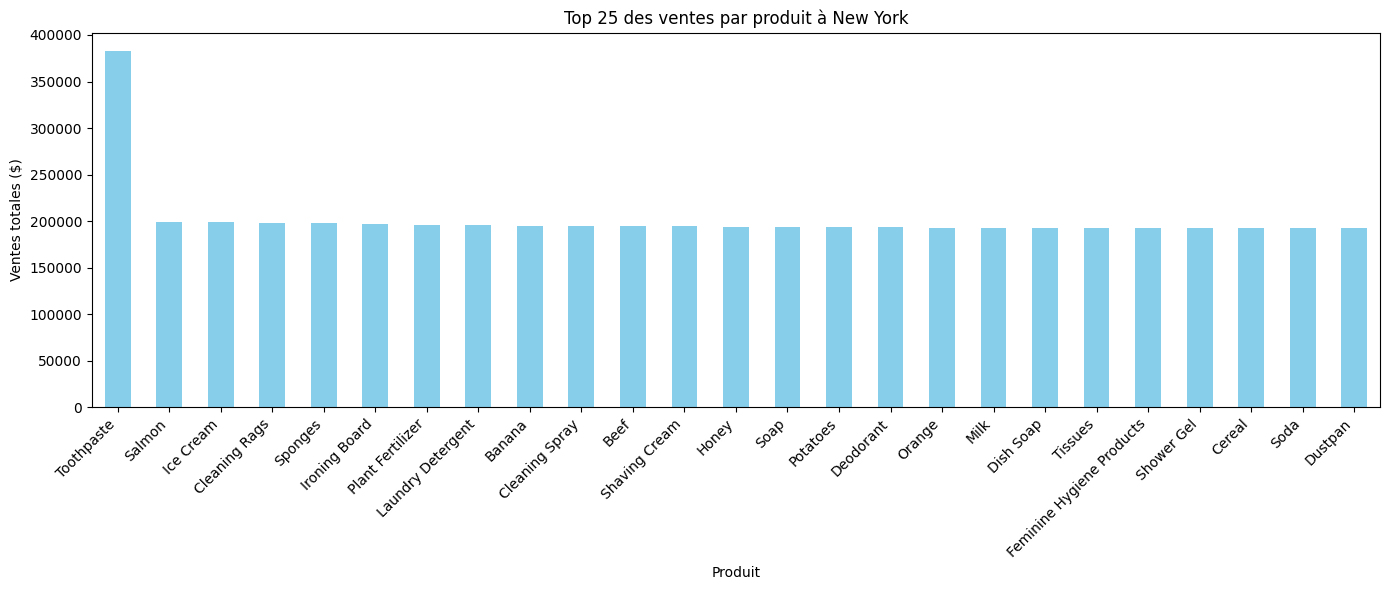

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Connexion à SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=localhost,1433;'  # Utilisation de localhost + port
    'DATABASE=DW_Retail;'
    'Trusted_Connection=yes;'
    'Encrypt=no;'
    'TrustServerCertificate=yes;'
)

# Lire la table Transactions_NewYork
df = pd.read_sql_query("SELECT * FROM Transactions_NewYork", conn)

# Regrouper par produit et sommer les ventes
sales_by_product = df.groupby('Product_Name')['Total_Cost'].sum().sort_values(ascending=False)

# Garder les 15 produits les plus vendus pour lisibilité
top_products = sales_by_product.head(25)

# Créer un graphique avec produits sur X et ventes sur Y
plt.figure(figsize=(14, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 25 des ventes par produit à New York')
plt.xlabel('Produit')
plt.ylabel('Ventes totales ($)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


DICE

C:\Users\user\AppData\Local\Temp\ipykernel_18964\2258215552.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM Sales_NewYork_Student_Winter", conn)


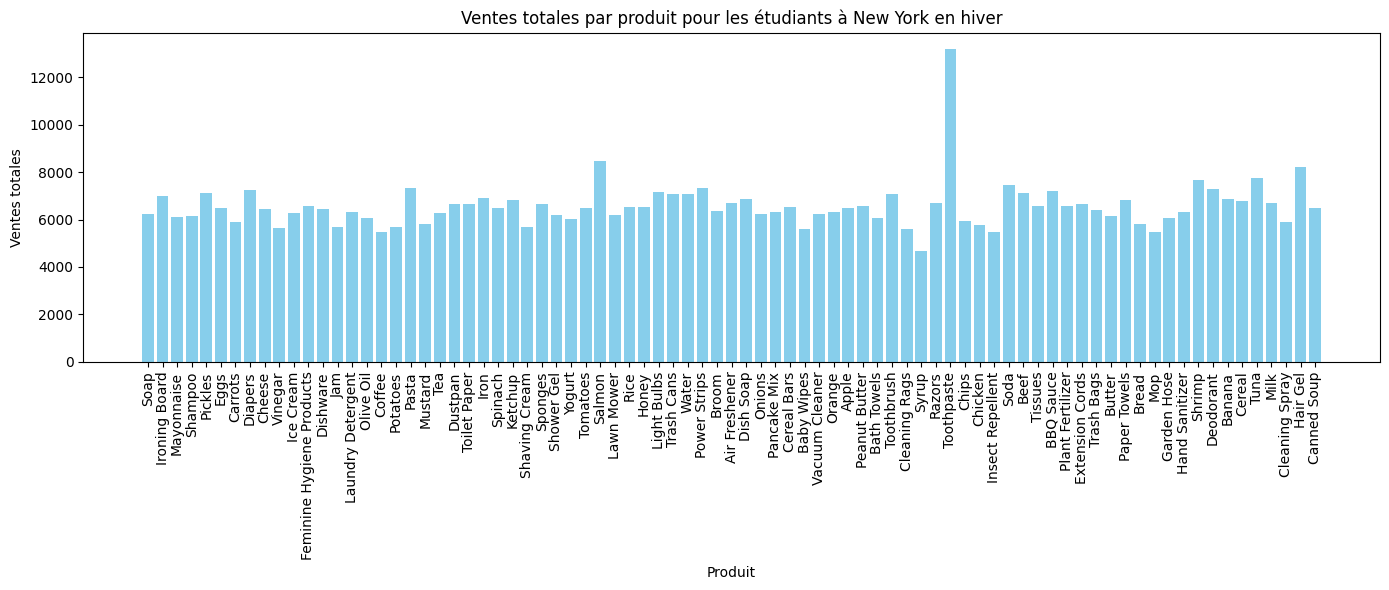

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Connexion à SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=localhost,1433;'  # Utilisation de localhost + port
    'DATABASE=DW_Retail;'
    'Trusted_Connection=yes;'
    'Encrypt=no;'
    'TrustServerCertificate=yes;'
)

# Lire la table Transactions_NewYork
df = pd.read_sql_query("SELECT * FROM Sales_NewYork_Student_Winter", conn)

# Tracer le graphique
plt.figure(figsize=(14,6))
plt.bar(df['Product_Name'], df['TotalSales'], color='skyblue')
plt.xlabel('Produit')
plt.ylabel('Ventes totales')
plt.title('Ventes totales par produit pour les étudiants à New York en hiver')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



ROLLUP

C:\Users\user\AppData\Local\Temp\ipykernel_18964\1852451798.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM ROLLUP_YEAR_PRODUCT_CITY", conn)


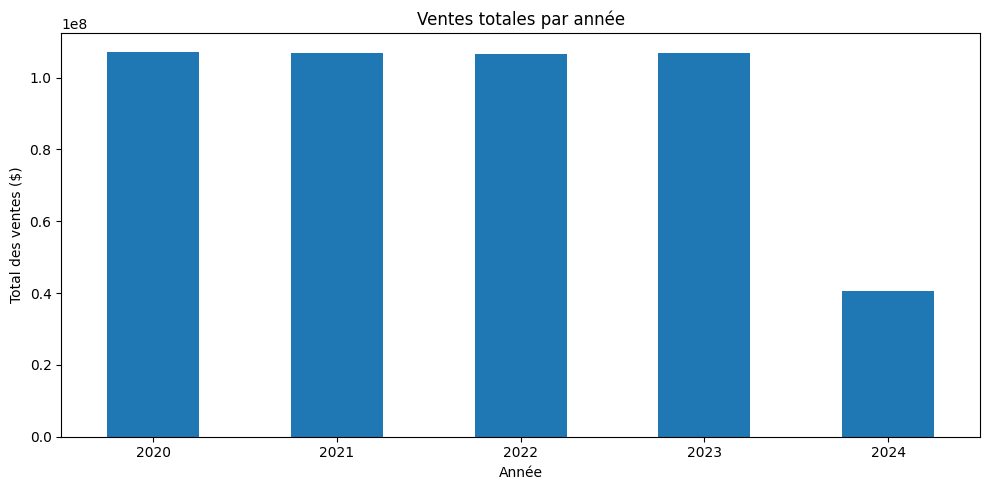

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Connexion à SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=localhost,1433;'
    'DATABASE=DW_Retail;'
    'Trusted_Connection=yes;'
    'Encrypt=no;'
    'TrustServerCertificate=yes;'
)

# Charger la table ROLLUP_YEAR_PRODUCT_CITY
df = pd.read_sql_query("SELECT * FROM ROLLUP_YEAR_PRODUCT_CITY", conn)

# Garder uniquement les lignes où l'année n'est pas NULL
df = df[df["Year"].notna()]

# Convertir les années en entier → supprime le ".0"
df["Year"] = df["Year"].astype(int)

# Regrouper par année
sales_by_year = df.groupby("Year")["TotalSales"].sum().sort_index()

# Création de l'histogramme
plt.figure(figsize=(10, 5))
sales_by_year.plot(kind='bar')
plt.title("Ventes totales par année")
plt.xlabel("Année")
plt.ylabel("Total des ventes ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


DRILL DOWN

C:\Users\user\AppData\Local\Temp\ipykernel_18964\823939754.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM DRILLDOW_NMONTH_CITY_PRODUCT", conn)


   Month         City Product_Name  TotalSales
0     11  Los Angeles  Bath Towels      4027.0
1      1  Los Angeles  Garden Hose      4885.0
2      3      Chicago          Jam      3321.0
3      4      Seattle    BBQ Sauce      4161.0
4      8      Chicago        Honey      3669.0


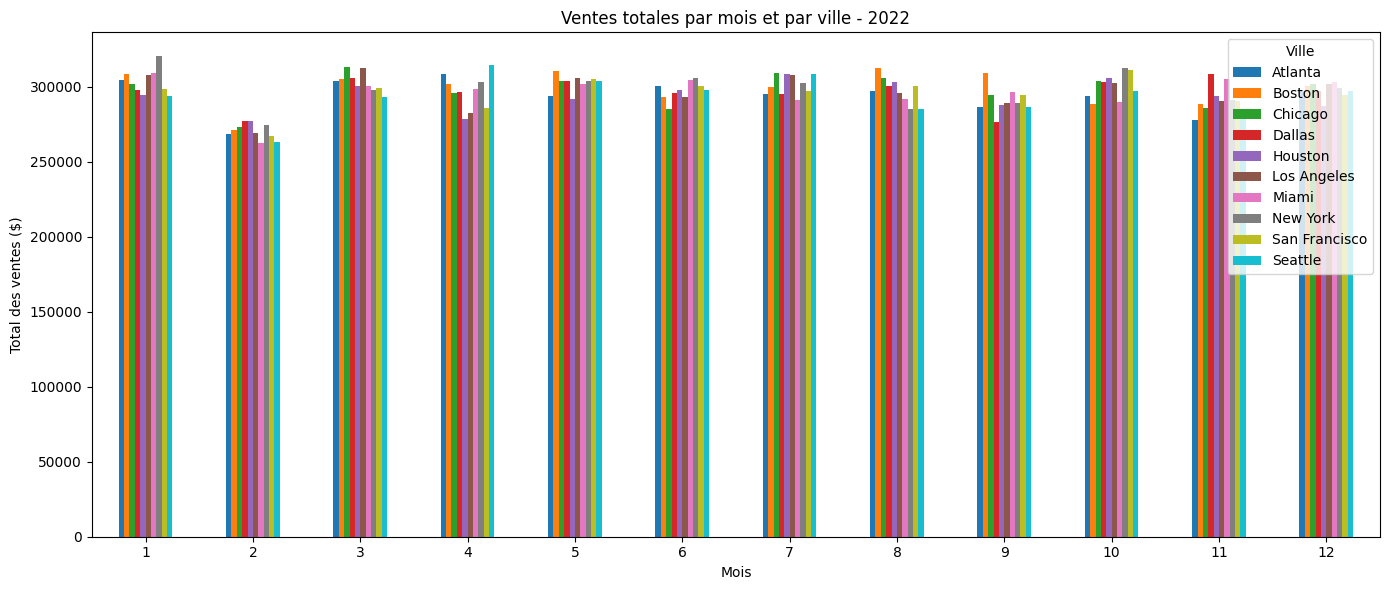

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Connexion à SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=localhost,1433;'
    'DATABASE=DW_Retail;'
    'Trusted_Connection=yes;'
    'Encrypt=no;'
    'TrustServerCertificate=yes;'
)

# Charger la table DRILLDOW_NMONTH_CITY_PRODUCT
df = pd.read_sql_query("SELECT * FROM DRILLDOW_NMONTH_CITY_PRODUCT", conn)

# Vérifier les données
print(df.head())

# Regrouper les ventes par mois et par ville (somme des ventes de tous les produits)
sales_by_month_city = df.groupby(['Month', 'City'])['TotalSales'].sum().unstack(fill_value=0)

# Création de l'histogramme groupé
sales_by_month_city.plot(kind='bar', figsize=(14, 6))
plt.title("Ventes totales par mois et par ville - 2022")
plt.xlabel("Mois")
plt.ylabel("Total des ventes ($)")
plt.xticks(rotation=0)
plt.legend(title="Ville")
plt.tight_layout()
plt.show()
